# Exercise - Multiple Linear Regression



It's time for you to apply your knowledge to a new dataset. So that not too much changes come at once, we will stick to the cars topic and work with the **car seats data**. A company that makes car seats would like to construct a model to predict sales and they need your help!

You will find the file called `carseats.csv` in the data folder. It contains 400 observations on the following 11 variables:
* **Sales**:         Unit sales (in thousands) at each location
* **CompPrice**:     Price charged by competitor at each location
* **Income**:        Community income level (in thousands of dollars)
* **Advertising**:   Local advertising budget for company at each location (in thousands of dollars)
* **Population**:    Population size in region (in thousands)
* **Price**:         Price company charges for car seats at each site
* **ShelveLoc**:     A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
* **Age**:           Average age of the local population
* **Education**:     Education level at each location
* **Urban**:         A factor with levels No and Yes to indicate whether the store is in an urban or rural location
* **US**:            A factor with levels No and Yes to indicate whether the store is in the US or not

**(a) Load the data**

In [10]:
import pandas as pd
import numpy as np

carseats = pd.read_csv("data/carseats.csv")
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [11]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


**Notes:**  
Loaded the dataset and checked the column types.  
Sales is the target variable.  
ShelveLoc, Urban, and US are categorical and will need encoding before regression.

**(b) Visualize the data with the appropriate plots.** 

<br>
<details><summary>
Click here for a hint…
</summary>
Check the documentation for seaborn's pair plots. 
</details>

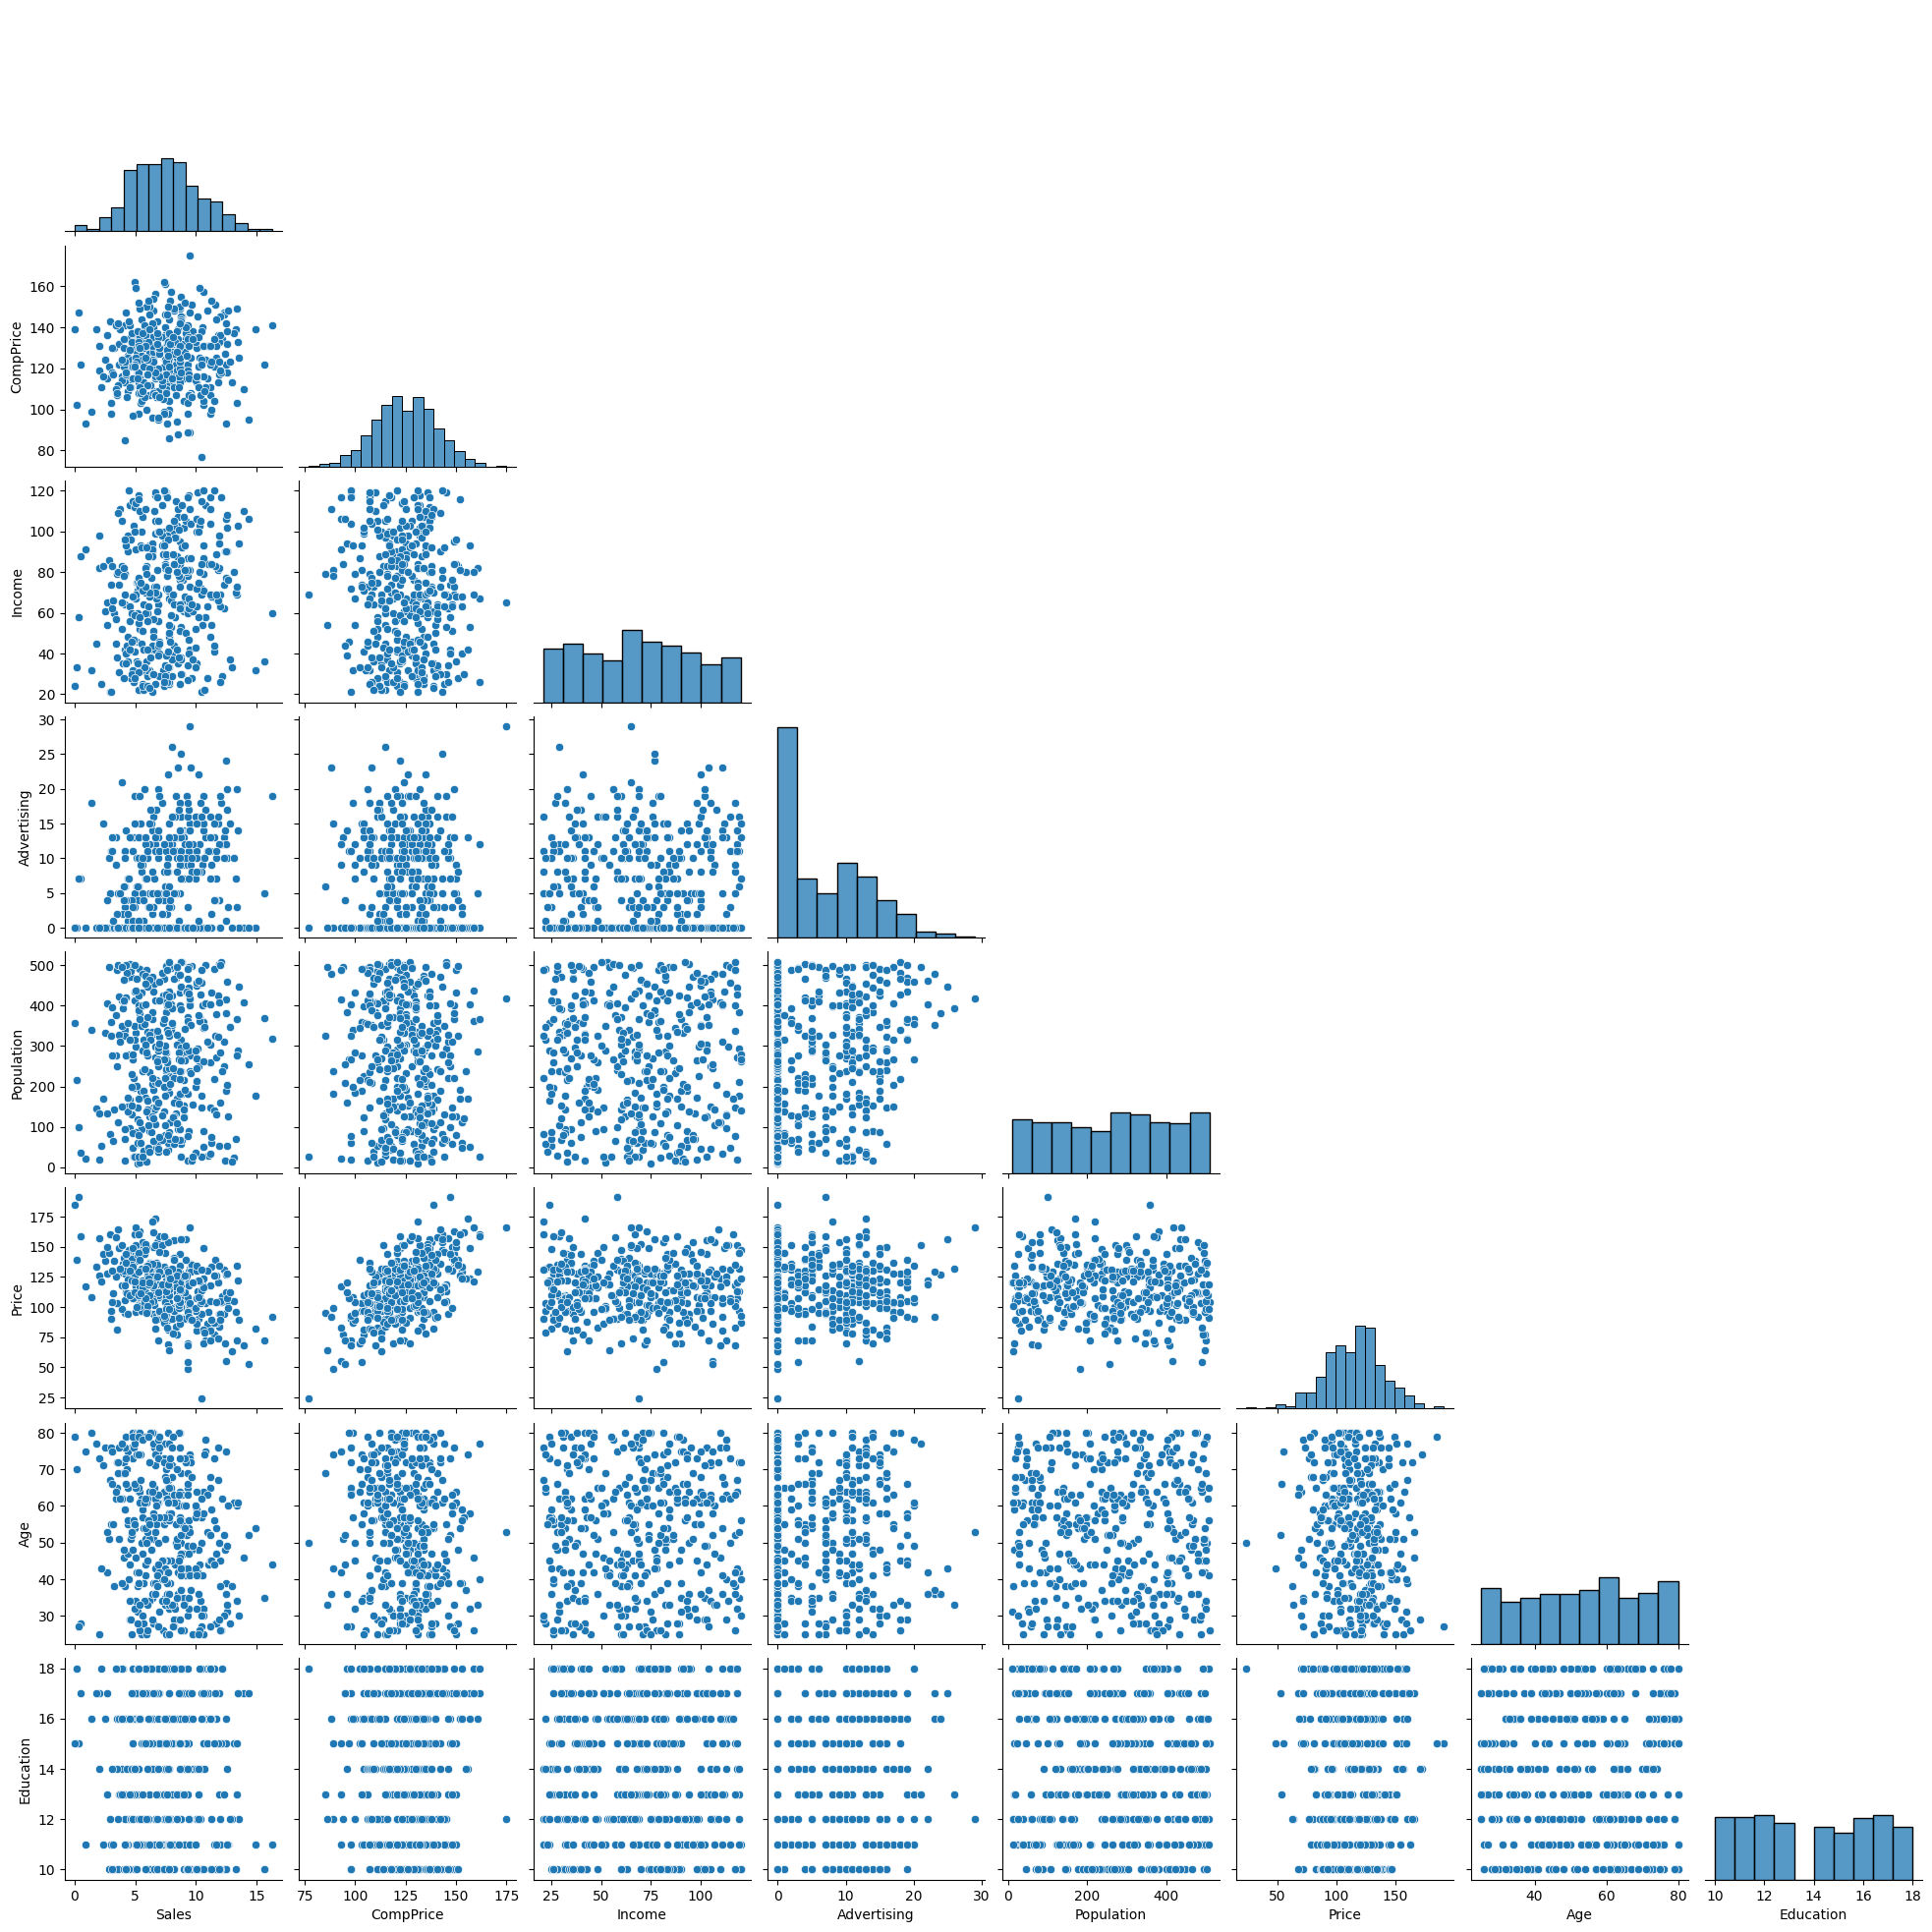

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = carseats.select_dtypes(include="number").columns
sns.pairplot(carseats[numeric_cols], corner=True)
plt.show()

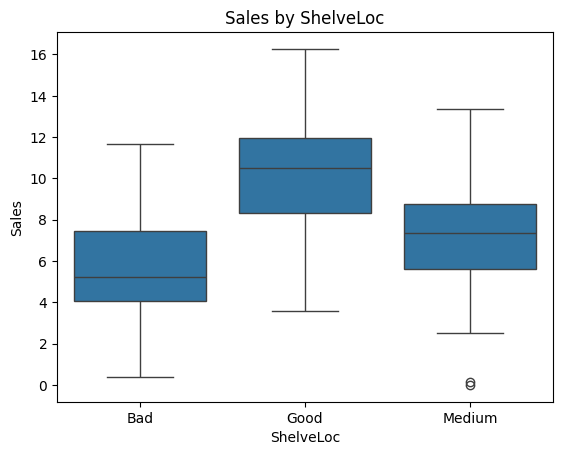

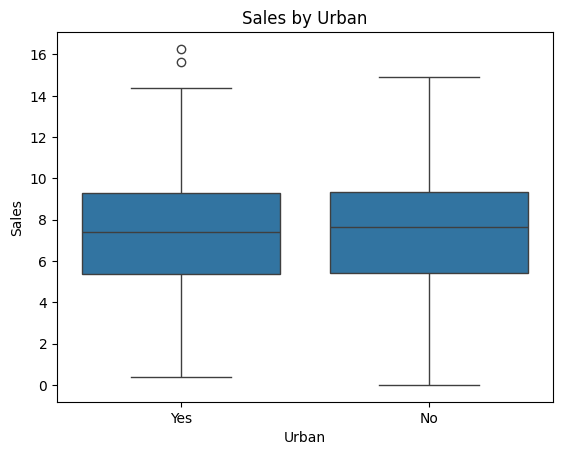

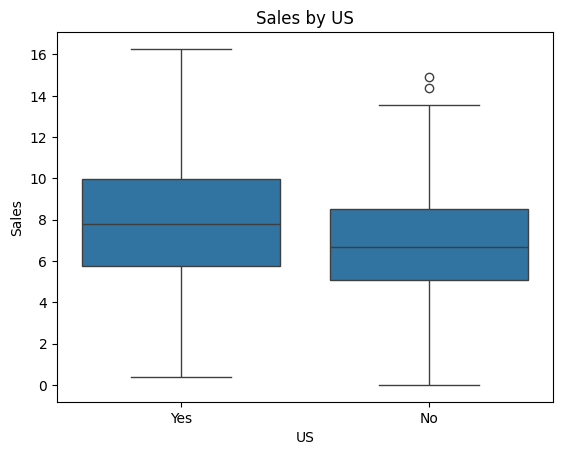

In [13]:
categorical_cols = carseats.select_dtypes(exclude="number").columns

for col in categorical_cols:
    plt.figure()
    sns.boxplot(data=carseats, x=col, y="Sales")
    plt.title(f"Sales by {col}")
    plt.show()

**Notes:**  
Pair plots help identify linear relationships between numeric variables and Sales.  
Box plots are useful for comparing Sales across categorical groups like ShelveLoc.

**(c) What trends do you see in the data?**

**Observed trends:**
- Sales tends to decrease as Price increases.
- Advertising has a clear positive relationship with Sales.
- ShelveLoc shows strong differences: “Good” locations generally have much higher Sales.
- Some variables like Population and Education show weak or unclear relationships.

**(d) Find the single best predictor for a simple linear regression.**

<br>
<details><summary>
Click here for a hint…
</summary>
Fit a linear model to all possible explanatory variables and pick best one.
</details>

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Target
y = carseats["Sales"]

# One-hot encode categorical variables
X = pd.get_dummies(carseats.drop(columns="Sales"), drop_first=True)

single_feature_results = []

for col in X.columns:
    Xi = X[[col]]
    model = LinearRegression().fit(Xi, y)
    y_hat = model.predict(Xi)
    r2 = r2_score(y, y_hat)
    single_feature_results.append((col, r2))

# Sort by R² (descending)
single_feature_results = sorted(single_feature_results, key=lambda x: x[1], reverse=True)
single_feature_results[:10]

[('ShelveLoc_Good', 0.2505103859805107),
 ('Price', 0.19798115021119478),
 ('Advertising', 0.07263390520813728),
 ('Age', 0.05373839803906311),
 ('US_Yes', 0.03136202558295664),
 ('Income', 0.02308910016114607),
 ('ShelveLoc_Medium', 0.0054758288685247125),
 ('CompPrice', 0.004106083580821762),
 ('Education', 0.002699347167967381),
 ('Population', 0.0025473202735769584)]

In [15]:
best_feature, best_r2 = single_feature_results[0]
best_feature, best_r2

('ShelveLoc_Good', 0.2505103859805107)

**Notes:**  
I fitted a simple linear regression model for each feature individually and compared
their R² values.  
The best single predictor is the feature with the highest R² on its own.

**(e) Fit a model with all possible explanatory variables.**

In [16]:
full_model = LinearRegression().fit(X, y)
y_hat_full = full_model.predict(X)

r2_full = r2_score(y, y_hat_full)
r2_full

0.8734133434127012

**Notes:**  
This model includes all explanatory variables (after encoding categorical ones).
It gives the highest possible R², but it may be overly complex.

**(f) What's the best model according to $R^2$?**

According to R², the best model is the full model with all explanatory variables.
This is expected, because R² almost always increases when more features are added.

**(g) Remove a couple of explanatory variables. How does $R^2$ change?**

In [17]:
# Identify weakest predictors
worst_features = [f for f, _ in single_feature_results[-3:]]
worst_features

['Education', 'Population', 'Urban_Yes']

In [18]:
# Reduced model
X_reduced = X.drop(columns=worst_features)

reduced_model = LinearRegression().fit(X_reduced, y)
y_hat_reduced = reduced_model.predict(X_reduced)

r2_reduced = r2_score(y, y_hat_reduced)
r2_reduced

0.8724942593587421

**Notes:**  
After removing weak predictors, R² decreases only slightly (or stays similar).
This suggests that these variables were not contributing much to the model.

**(h) Repeat the process for the adjusted $R^2$.**

In [19]:
def adjusted_r_squared(r2, X):
    n = X.shape[0]
    p = X.shape[1]
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

adj_r2_single = adjusted_r_squared(best_r2, X[[best_feature]])
adj_r2_full = adjusted_r_squared(r2_full, X)
adj_r2_reduced = adjusted_r_squared(r2_reduced, X_reduced)

adj_r2_single, adj_r2_full, adj_r2_reduced

(0.24862724624679344, 0.8698245464475973, 0.8698854462509926)

In [20]:
comparison = pd.DataFrame({
    "Model": ["Best single feature", "Full model", "Reduced model"],
    "Number of features": [1, X.shape[1], X_reduced.shape[1]],
    "R2": [best_r2, r2_full, r2_reduced],
    "Adjusted_R2": [adj_r2_single, adj_r2_full, adj_r2_reduced]
})

comparison

,Model,Number of features,R2,Adjusted_R2
0,Best single feature,1,0.250510,0.248627
1,Full model,11,0.873413,0.869825
2,Reduced model,8,0.872494,0.869885


**Notes:**  
Adjusted R² penalizes unnecessary complexity.
The model with the highest adjusted R² is preferred when comparing models with
different numbers of features.

**(i) What are your most interesting findings?**

**Most interesting findings:**
- The strongest single predictor of Sales is **good shelf location (ShelveLoc = Good)**.
- Price has a clear negative relationship with Sales: higher prices generally lead to
  lower sales.
- Advertising has a positive relationship with Sales and helps increase demand.
- The full model achieves the highest R², but this is mainly because it includes many
  variables.
- Adjusted R² shows that removing weak predictors has little impact on performance,
  meaning a simpler model can explain the data almost as well.

<br>
<br> 
<br>

----